In [1]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

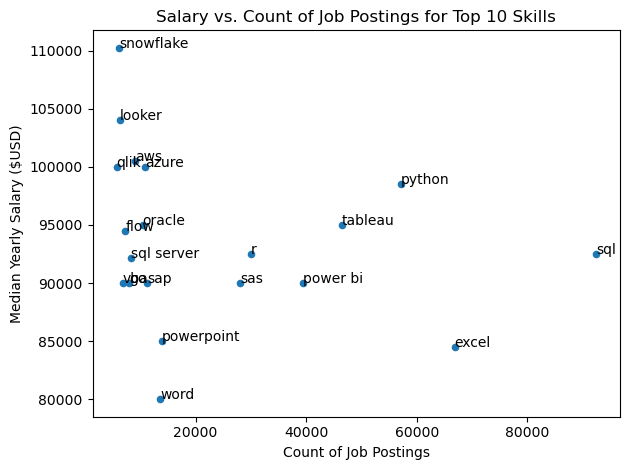

In [17]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
    
)

skill_count = 20
skill_stats= skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()



for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()

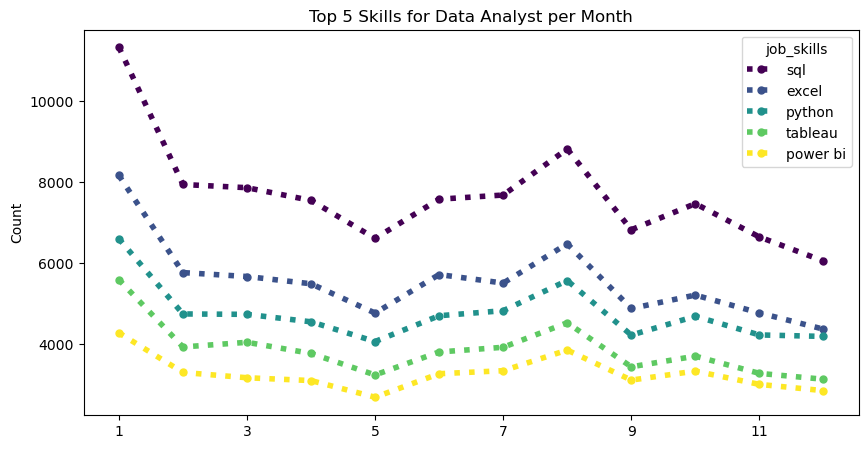

In [16]:
df_DA= df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc= 'size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()


df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
    
    
    )
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel(' ')
plt.show()

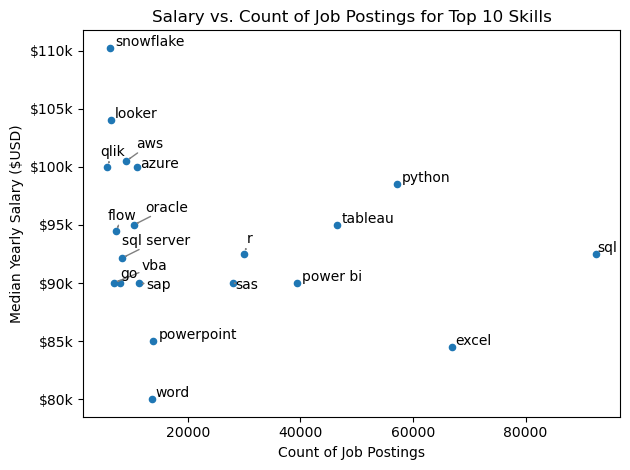

In [19]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_exploded = df_DA.explode('job_skills')



skill_stats = df_exploded.groupby('job_skills').agg(
    
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
    
)

skill_count = 20
skill_stats= skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts=[]

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

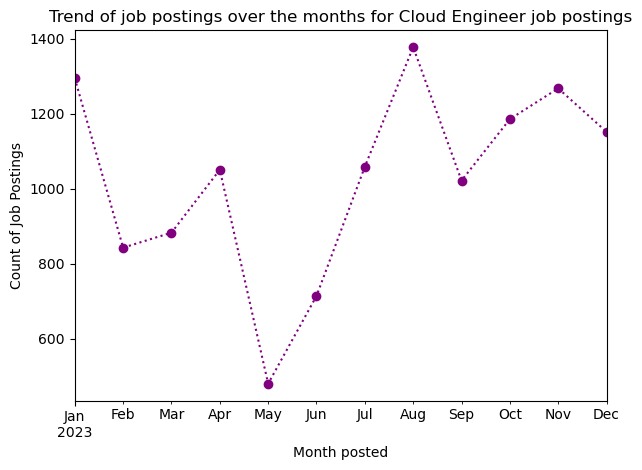

In [42]:
df_ce= df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

plotear = df_ce.groupby('job_posted_month').size()
plotear.plot(
    
    
    x='job_posted_month', 
    y='job_count', 
    kind='line',
    color='purple',
    linestyle=':',
    marker='o'
    
    
    )


plt.xlabel('Month posted')
plt.ylabel('Count of Job Postings')
plt.title('Trend of job postings over the months for Cloud Engineer job postings')
plt.tight_layout()
plt.show()

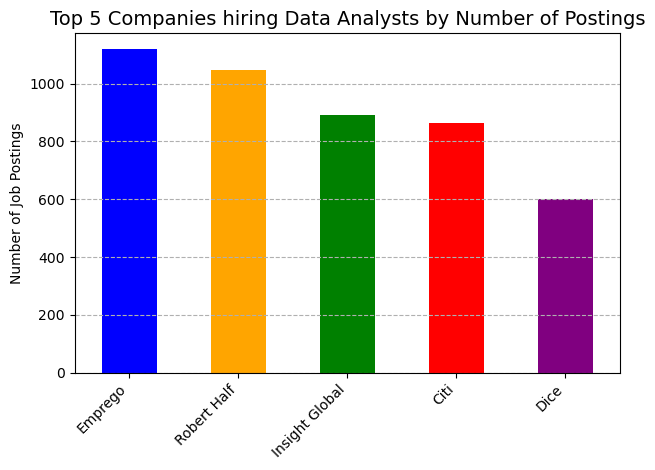

In [76]:
SDA_df = df[df['job_title_short']=='Data Analyst'].copy()
colors = ['blue', 'orange', 'green', 'red', 'purple']
location_counts = SDA_df['company_name'].value_counts().head(5)


location_counts.plot(kind='bar', color=colors)
plt.title('Top 5 Companies hiring Data Analysts by Number of Postings', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()